In [1]:
import pandas as pd
import numpy as np

np.random.seed(123)

sample_size = 3650
years = [1992,1993,1994,1995]

df = pd.DataFrame([np.random.normal(32000,200000,sample_size),
                   np.random.normal(38000,100000,sample_size),
                   np.random.normal(38000,140000,sample_size),
                   np.random.normal(46000,70000,sample_size)],
                  index=years)

In [2]:
df = df.transpose()

df.describe()

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,32781.548207,40754.771218,39544.775190,47063.842477
std,196129.408946,99529.202882,142940.207648,70280.514695
min,-728275.639372,-330549.920645,-463406.352267,-200359.770940
25%,-99814.793827,-27900.364969,-58383.294166,-581.586767
50%,35411.206291,40931.612888,39898.420989,46298.557029
75%,164612.435924,110066.985573,134479.059024,93254.766269
max,746315.843605,341787.847155,607533.568077,292816.184378


In [3]:
#from scipy import stats 
#
#df = df.transpose()
#ye1 = list(df.apply(lambda x: stats.t.interval(0.95, len(x)-1, loc =np.mean(x), scale=stats.sem(x)), axis=1))



In [4]:
import math

nearest = 100
Y = 39000

df_p = pd.DataFrame()
df_p['diff'] = nearest*((Y-df.mean())//nearest)
df_p['sign'] = df_p['diff'].abs()/df_p['diff']

old_range = abs(df_p['diff']).min(),df_p['diff'].abs().max()
new_range = 0.5,1

df_p['shade'] = df_p['sign']*np.interp(df_p['diff'].abs(), old_range, new_range)

In [5]:
shade = list(df_p['shade'])

from matplotlib import cm

blues = cm.Blues
reds = cm.Reds

color = ['White' if x == 0 else reds(abs(x))
         if x < 0 else blues(abs(x)) for x in shade]

In [6]:
import math

mean = list(df.mean())

std = list(df.std())

ye1 = []

for i in range (4) :
    ye1.append(1.96*(std[i]/math.sqrt(len(df))))
    
ye1  

[6362.859867867298, 3228.9414122013295, 4637.287776638477, 2280.051058377018]

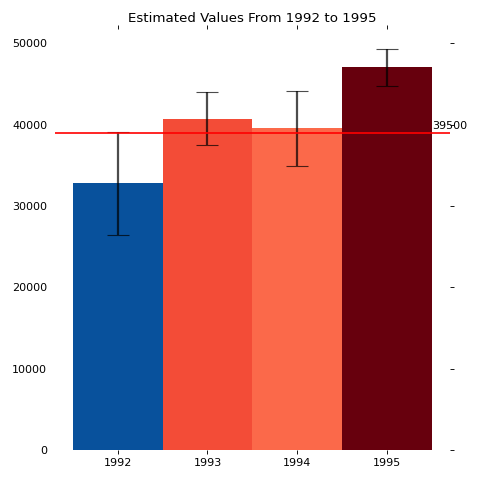

In [9]:
import matplotlib.pyplot as plt

%matplotlib widget

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

plt.bar(range(len(df.columns)), height = df.values.mean(axis = 0), 
        yerr=ye1, error_kw={'capsize': 10, 'elinewidth': 2, 'alpha':0.7}, color = color, width = 1)

plt.axhline(y=Y, color = 'red', label = 'Y')

plt.text(3.5, 39500, "39500")

plt.xticks(range(len(df.columns)), df.columns)

plt.tick_params(bottom=False, right=False, left = False, top = False)

plt.title('Estimated Values From 1992 to 1995')

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off',  right='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
def recolorBars(self, event):      
    y = event.ydata
    for i, rect in enumerate(self.rects):
        t, p, _ = sms.DescrStatsW(self.df[self.df.columns[i]]).ttest_mean(y)
        rect.set_color(self.cpick.to_rgba((1 - p) * t / abs(t)))
        cpick = cm.ScalarMappable(cmap=cmap)
        cpick.set_array(np.linspace(-1, 1))

plt.tight_layout()